In [133]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
input_text = au.read_txt_file_lines()
# input_mat = input_text[:8]
# input_dirs = input_text[9:]

In [135]:
# input_mat = input_text[:50]
# input_dirs = input_text[51:]

input_mat = input_text[:10]
input_dirs = input_text[11:]

print(input_mat)

['##########', '#..O..O.O#', '#......O.#', '#.OO..O.O#', '#..O@..O.#', '#O#..O...#', '#O..O..O.#', '#.OO.O.OO#', '#....O...#', '##########']


In [136]:
print(input_dirs)

['<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^', 'vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v', '><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<', '<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^', '^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><', '^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^', '>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^', '<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>', '^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>', 'v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^']


In [137]:
dirs = ''.join(input_dirs)

n_rows = len(input_mat)
n_cols = len(input_mat[0])
for ii in range(1, n_rows):
    assert len(input_mat[ii]) == n_cols, f'row {ii} has {len(input_mat[ii])} cols, not {n_cols}'
print(f'input map has {n_rows} rows and {n_cols} cols')

input map has 10 rows and 10 cols


In [138]:
# mat = copy.deepcopy(input_mat)
mapping_els = {'.': 0, 'O': 1, '@': 2, '#': 3}
mat = np.zeros((n_rows, n_cols), dtype=int)
for ir in range(n_rows):
    for ic in range(n_cols):
        mat[ir, ic] = mapping_els[input_mat[ir][ic]]

start_ir, start_ic = np.where(mat == 2)
start_ir, start_ic = start_ir[0], start_ic[0]
print(start_ir, start_ic)
ir, ic = start_ir, start_ic

map_dirs = {'>': (0, 1), '<': (0, -1), 'v': (1, 0), '^': (-1, 0)}
# print(mat)
for str_d in dirs:
    
    d = map_dirs[str_d]
    # print(str_d, d)
    start_ir, start_ic = copy.deepcopy(ir), copy.deepcopy(ic)

    if mat[ir + d[0], ic + d[1]] == 0:
        # print('step')
        mat[ir + d[0], ic + d[1]] = 2
        mat[ir, ic] = 0
        ir += d[0]
        ic += d[1]
        # print(mat)
        continue 

    while mat[ir + d[0], ic + d[1]] == 1:
        # print('box')
        ir += d[0]
        ic += d[1]

    if mat[ir + d[0], ic + d[1]] == 3:
        # print('wall')
        ir, ic = start_ir, start_ic
        continue 
    else:
        # print('post box step')
        mat[ir + d[0], ic + d[1]] = 1
        mat[start_ir + d[0], start_ic + d[1]] = 2
        mat[start_ir, start_ic] = 0
        ir = start_ir + d[0]
        ic = start_ic + d[1]
        # print(mat)
        continue 




4 4


In [139]:
total = 0
for ir in range(n_rows):
    for ic in range(n_cols):
        if mat[ir, ic] == 1:
            total += ir * 100
            total += ic

total

10092

# part 2

In [243]:
input_text = au.read_txt_file_lines()

input_mat = input_text[:50]
input_dirs = input_text[51:]
# input_mat = input_text[:7]
# input_dirs = input_text[8:]
# input_mat = input_text[:10]
# input_dirs = input_text[11:]
dirs = ''.join(input_dirs)

print(input_mat)
print(dirs)

['##################################################', '#..O.O..#..O.O.O.O.......##O..OOO.....O...O..#..O#', '#.O.O.#.....O..O......O.O.OOO.......OO.O.....#...#', '#OO........O.....OO......##OO.#OO.OO..O....OOO...#', '#......O...O..O.#....O...O.....O..#.O.O.O...#O...#', '#OOO.OO.OO...####O.#O...O..OO...O#.O..#.OO.O...O.#', '#O#...OOOO......O#O#....#OO...O.....O.O.OOO.OOO..#', '#O.O...O.#OO......#...........O...OO.O..O#.#OO...#', '#O.....O.O.O.#...OO..O#....OO.O.O....#.........O.#', '#.O.#O.O#...O#..O.O.#.O.OO..O..O...O.O...OO.O...O#', '#..#..O.#.O..##......OO...........O.....O...#.#..#', '#.OO#.........O...O.....OO.O...OO............O#.O#', '##.O.OO.O...O.O..O..OO.#....O.#....O......OOO...O#', '#..OO..O.O..O..O..O...O..O.....#OO.....O...#OOO.O#', '#.......O.#O.OO..#......O..OO.......O..O.O....OO##', '#.....O.........O...#.O..O..#OO.O...O.O.#....O...#', '#.OO##O#..O.#..O......OO..OO.OO.....O..OO#O.O..O##', '#.O....O...#O.O..O#....O#O...OO.....O....O.......#', '#...OOO....#O.OO...#.OO#O.

In [244]:
for ir, r in enumerate(input_mat):
    input_mat[ir] = ''.join([x.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.') for x in r])

input_mat


['####################################################################################################',
 '##....[]..[]....##....[]..[]..[]..[]..............####[]....[][][]..........[]......[]....##....[]##',
 '##..[]..[]..##..........[]....[]............[]..[]..[][][]..............[][]..[]..........##......##',
 '##[][]................[]..........[][]............####[][]..##[][]..[][]....[]........[][][]......##',
 '##............[]......[]....[]..##........[]......[]..........[]....##..[]..[]..[]......##[]......##',
 '##[][][]..[][]..[][]......########[]..##[]......[]....[][]......[]##..[]....##..[][]..[]......[]..##',
 '##[]##......[][][][]............[]##[]##........##[][]......[]..........[]..[]..[][][]..[][][]....##',
 '##[]..[]......[]..##[][]............##......................[]......[][]..[]....[]##..##[][]......##',
 '##[]..........[]..[]..[]..##......[][]....[]##........[][]..[]..[]........##..................[]..##',
 '##..[]..##[]..[]##......[]##....[]..[]..##..[]..[][].

In [245]:
plotting = False
verbose = False
# dirs = dirs[:100]

def plot_mat(mat, ax, t=''):
    if ax is None:
        ax = plt.figure(111)
    ax.imshow(mat, interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t)
    
n_rows = len(input_mat)
n_cols = len(input_mat[0])
mapping_els = {'.': 0, '[': 4, ']': 5, '@': 2, '#': 3}
mat = np.zeros((n_rows, n_cols), dtype=int)
for ir in range(n_rows):
    for ic in range(n_cols):
        mat[ir, ic] = mapping_els[input_mat[ir][ic]]

start_ir, start_ic = np.where(mat == 2)
start_ir, start_ic = start_ir[0], start_ic[0]
ir, ic = start_ir, start_ic

map_dirs = {'>': (0, 1), '<': (0, -1), 'v': (1, 0), '^': (-1, 0)}
if plotting:
    fig, ax = plt.subplots(len(dirs) // 7 + 1, 7, figsize=(14, 3 * (len(dirs) // 7) + 3), gridspec_kw={'hspace': 0.03})
ax = np.ravel(ax)
it = 0
for str_d in dirs:
    if verbose and it in range(310, 314):
        print('--', {it}, '--')
    if plotting:
        plot_mat(mat, ax[it], f'{it} {str_d}')
    it += 1
    d = map_dirs[str_d]
    start_ir, start_ic = copy.deepcopy(ir), copy.deepcopy(ic)

    if mat[ir + d[0], ic + d[1]] == 0:  # direct step possible
        mat[ir + d[0], ic + d[1]] = 2
        mat[ir, ic] = 0
        ir += d[0]
        ic += d[1]
        continue 
    elif mat[ir + d[0], ic + d[1]] == 3:  # wall
        continue 

    # queue = deque([(ir, ic, mat[ir, ic])])
    # assert mat[ir, ic] == 2

    # while len(queue) > 0:
    #     (tmp_r, tmp_c, tmp_el) = queue.popleft()

    #     if 

    #     if d[0] != 0 and tmp_el == 4:
            


    hit_wall = False
    if d in [(0, 1), (0, -1)]:  ## if moving horizontally, keep going until end of boxes:
        if verbose and it in range(310, 314):
            print('going horiz', ir, ic)
        assert d[1] != 0 and d[0] == 0, d
        ic += d[1]
        while mat[ir, ic] in [4, 5]:
            ic += d[1]
        if verbose and it in range(310, 314):
            print(ir, ic, start_ic)

    else:  # vertical:
        assert d[1] == 0 and d[0] != 0, d
        dict_cols = {ir: [start_ic]}
        keep_going = True
        ir += d[0]  # start at next row, will NOT be .
        dict_cols[ir] = [start_ic]
        while keep_going:
            # dict_cols[ir + d[0]] = [x for x in dict_cols[ir]]
            next_row_clear = True  # default to true 
            c_remove = []
            if verbose and it in range(310, 314):
                print(ir, dict_cols[ir])
            for c in dict_cols[ir]:
                if mat[ir, c] == 4:  # if box hit, row not clear, include right neighbour
                    if c + 1 not in dict_cols[ir]:  
                        dict_cols[ir].append(c + 1)  # might mess up loop but not really an issue I think .. 
                    next_row_clear = False
                elif mat[ir, c] == 5:  # box, add left neighbour
                    if c - 1 not in dict_cols[ir]:
                        dict_cols[ir].append(c - 1)
                    next_row_clear = False
                elif mat[ir, c] == 3:  # wall 
                    next_row_clear = False
                    hit_wall = True
                    keep_going = False
                    break
                else:
                    c_remove.append(c)
                    # if verbose and it in range(310, 314):
                    #     print(ir, c, 'remove')
                    # print(c)

            # dict_cols[ir] = [c for c in dict_cols[ir] if c not in c_remove]
            
            if next_row_clear:  # end of loop
                keep_going = False
            else:
                # dict_cols[ir + d[0]] = [x for x in dict_cols[ir] if mat[ir, x] != 0]
                dict_cols[ir + d[0]] = []
                for x in dict_cols[ir]:
                    if mat[ir, x] != 0:
                        dict_cols[ir + d[0]].append(x)
                    elif mat[ir + d[0], x] in [4, 5]:
                        if mat[ir + d[0], x] == 4:
                            ind_neigh = 1
                        else:
                            ind_neigh = -1
                        if mat[ir, x + ind_neigh] != 0 and x + ind_neigh in dict_cols[ir]:
                            dict_cols[ir + d[0]].append(x)



                ir += d[0]

    if hit_wall or (mat[ir, ic] == 3):  #if wall hit 
        if verbose and it in range(310, 314):
            print('wall', ir, ic)
        ir, ic = start_ir, start_ic
        continue 
    else:  # clear point after boxes:
        # assert mat[ir, ic] == 0, (ir, ic, start_ir, start_ic, mat[ir, ic], d)
        if d in [(0, 1), (0, -1)]:  # horizontal
            if verbose and it in range(310, 314):
                print(ir, ic, start_ic, d[1])
            for tmp_c in range(ic, start_ic, -d[1]):  # end to beginning in reverse
                mat[ir, tmp_c] = mat[ir, tmp_c - d[1]]  # take on previous element
            assert ir == start_ir
            assert tmp_c - d[1] == start_ic

            mat[ir, tmp_c - d[1]] = 0  
            
        else:  # vertical 
            # print(it, dict_cols)

            # sorted_row_keys = sorted(dict_cols.keys())  # mapping_els = {'.': 0, '[': 4, ']': 5, '@': 2, '#': 3}
            # for tmp_r in sorted_row_keys:
            #     new_c_array = []
            #     for c in dict_cols[tmp_r]:
            #         if mat[tmp_r, c] == 2:
            #             new_c_array.append(c)
                    


            # ########
            # for tmp_r in range(ir, start_ir, -d[0]):
            #     print('row', tmp_r)
            #     for c in dict_cols[tmp_r]:
            #         if tmp_r - d[0] in dict_cols.keys() and c in dict_cols[tmp_r - d[0]]:
            #             if mat[tmp_r - d[0], c] != 0:
            #                 print(c)
            #                 mat[tmp_r, c] = mat[tmp_r - d[0], c]
            #         else:
            #             mat[tmp_r, c] = 0
            
            # assert tmp_r - d[0] == start_ir
            # mat[start_ir, start_ic] = 0
            # ########

            tmp_mat_old = copy.deepcopy(mat)
            for tmp_r in range(start_ir, ir, d[0]):
                if verbose and it in range(310, 314):
                    print('row', tmp_r)
                for c in dict_cols[tmp_r]:
                    if tmp_mat_old[tmp_r, c] == 2:
                        if verbose and it in range(310, 314):
                            print(tmp_r, c)
                        mat[tmp_r, c] = 0
                        mat[tmp_r + d[0], c] = tmp_mat_old[tmp_r, c]
                    elif tmp_mat_old[tmp_r, c] in [4, 5]:
                        if tmp_mat_old[tmp_r - d[0], c] in [2, 4, 5] and tmp_r - d[0] in dict_cols.keys() and c in dict_cols[tmp_r - d[0]]:
                            if verbose and it in range(310, 314):
                                print(tmp_r, c)
                            mat[tmp_r + d[0], c] = tmp_mat_old[tmp_r, c]
                        else:
                            neighbour = 1 if tmp_mat_old[tmp_r, c] == 4 else -1
                            n_el = 5 if tmp_mat_old[tmp_r, c] == 4 else 4
                            if tmp_mat_old[tmp_r, c + neighbour] == n_el and tmp_mat_old[tmp_r - d[0], c + neighbour] in [2, 4, 5]:
                                mat[tmp_r + d[0], c] = tmp_mat_old[tmp_r, c]
                                mat[tmp_r, c] = 0

            # mat[start_ir, start_ic] = 0     

        ir = start_ir + d[0]
        ic = start_ic + d[1]
        continue 

print('finished')
if plotting:
    plot_mat(mat, ax[it], it)

finished


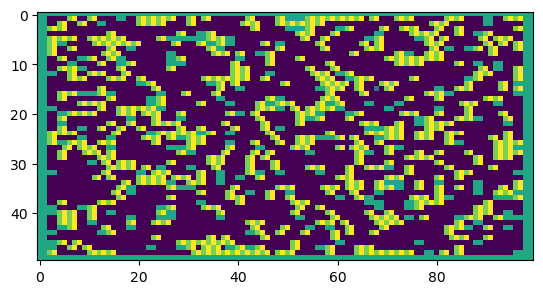

In [246]:
# import matplotlib.pyplot as plt
plt.imshow(mat, interpolation='none')
# mat

In [247]:
it

20000

In [248]:
total = 0
for ir in range(n_rows):
    for ic in range(n_cols):
        if mat[ir, ic] == 4:
            total += ir * 100
            total += ic

total

1501209